# Feature Importance using Ensemble Classifiers

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [7]:
# Feature importance
import numpy as np
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X.shape
y.shape
X[0:5,:]
y[0:10]

(12000, 10)

(12000,)

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
         0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
        -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
         0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
        -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028]])

array([ 1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1.])

In [8]:
clf = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,
                                max_depth=2,random_state=0).fit(X,y)
clf.feature_importances_

array([0.10909633, 0.10391111, 0.1133277 , 0.09810207, 0.10060279,
       0.10514883, 0.09198521, 0.09682167, 0.09441205, 0.08659223])

# Partial dependence plot

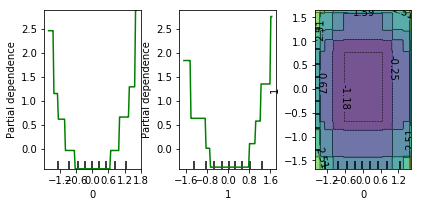

In [9]:
#Partial dependence plots (PDP) show the dependence between the target response and a set of ‘target’ features, 
#marginalizing over the values of all other features (the ‘complement’ features).

#read more about PDPs here: https://www.kaggle.com/dansbecker/partial-dependence-plots 
#and http://scikit-learn.org/stable/auto_examples/ensemble/plot_partial_dependence.html

#One-way PDPs tell us about the interaction between the target response and the target feature (e.g. linear, non-linear).
#PDPs with two target features show the interactions among the two features.
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence

X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,
                                max_depth=1,random_state=0).fit(X, y)
#show 1-way PDP for feature 0, 1-way PDP for feature 1, 2-way PDP for features 0 and 1 combined.
features = [0, 1, (0, 1)]
fig, axs = plot_partial_dependence(clf, X, features)

In [ ]:
#For multi-class models, you need to set the class label for which the PDPs should be created via the label argument:
from sklearn.datasets import load_iris
iris = load_iris()
mc_clf = GradientBoostingClassifier(n_estimators=10,
    max_depth=1).fit(iris.data, iris.target)
features = [3, 2, (3, 2)]
fig, axs = plot_partial_dependence(mc_clf, iris.data, features, label=0) 
fig, axs = plot_partial_dependence(mc_clf, iris.data, features, label=1) 
fig, axs = plot_partial_dependence(mc_clf, iris.data, features, label=2) 